# Fleming Pipeline - ipython notebook version

Note on astrometry.net keys:
[Go to the website](http://nova.astrometry.net/api_help) and sign in and follow the instructions.

Key shouldn't matter if not `force_upload==False`
~~Need to add your own key to `~/.astroquery/config/astroquery.cfg` and `pipeline/astrometry_api_key.txt`~~

In [1]:
## Imports
import Reducer
import ShiftFinder
import FluxFinder
import DataAnalyser
import Constants
import Utilities
import MovingObjectFinder
import StreakFinder
import Cataloguer

from datetime import datetime
import os
import importlib

#from astroquery import log
#log.setLevel("TRACE")


In [ ]:
## Reload imports (if files changed, only used for testing)
Reducer = importlib.reload(Reducer)
ShiftFinder = importlib.reload(ShiftFinder)
FluxFinder = importlib.reload(FluxFinder)
DataAnalyser = importlib.reload(DataAnalyser)
Utilities = importlib.reload(Utilities)
Cataloguer = importlib.reload(Cataloguer)
Constants = importlib.reload(Constants)


In [2]:
# REMOVE ME WHEN NOT USING DARK MODE
import matplotlib as mpl
COLOR = "white"
#COLOR = "black"
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [3]:
config = Constants.Config(
    #image_subdir = "../images/0121",
    image_dir = "/home/callum/mnt/data/jgtdata/l137_0",
    image_prefix = "l137_0",
    has_sets = True,
    set_size = 50,
    n_sets = 7
)

In [ ]:
r = Reducer.Reducer(config, "No filter") ## Only "No filter" for Trius
r.reduce(skip_existing=True)
Utilities.print_job("reducing images")

In [4]:
c = Cataloguer.Cataloguer(config)
catalogue_image = os.path.join(config.image_dir,
        config.image_format_str.format(1, 1))
#print(catalogue_image)
c.catalogue(catalogue_image)
Utilities.print_job("cataloguing images")

[Cataloguer] filtered out 118 objects
[Cataloguer] Catalogued 1108 objects
[Cataloguer] Getting coordinate system for image '/home/callum/mnt/data/jgtdata/l137_0/l137_0_1_001.fit'
[Astrometry] Starting job
Determining background stats


Finding sources
Found 1355 sources
 id      xcentroid      ...        flux                 mag          
---- ------------------ ... ------------------ ----------------------
 881 2078.6676678777644 ... 168.73045076485548     -5.567983666842608
 428 1312.5969976127772 ...  161.7241408363077     -5.521937131544891
1296  752.8349638637275 ... 158.32350036887271     -5.498863457765951
1121 1473.1473451113136 ...  133.2528962604471     -5.311691643050666
 606 1233.8588987377507 ...   131.428198146547     -5.296721384627498
 917 1015.1401707765954 ...  128.1301155178985    -5.2691280442307145
 787 1523.1761813437708 ... 118.90228311343414     -5.187975484613304
 368 1165.2002511192618 ... 112.79986988619136     -5.130771496730416
 ...                ... ...                ...                    ...
 321  87.03187558897051 ... 1.0059251130527922  -0.006414126256755618
 630 1677.6664477527775 ... 1.0054829274069417  -0.005936752235173444
1315 1995.4931867732557 ... 1.0052621224314129  -0.0056

In [ ]:
sf = ShiftFinder.ShiftFinder(config)
sf.get_all_shifts()
Utilities.print_job("finding shifts")

In [10]:
FluxFinder = importlib.reload(FluxFinder)
DataAnalyser = importlib.reload(DataAnalyser)
Utilities = importlib.reload(Utilities)

In [11]:
ff = FluxFinder.FluxFinder(config, c.get_n_sources())
ff.find_all_fluxes()
ff.make_light_curves()
Utilities.print_job("making light curves")

[DEBUG] looping images
[FluxFinder] Finding fluxes for image: set 1; image 001
[FluxFinder] Finding fluxes for image: set 1; image 002
[FluxFinder] Finding fluxes for image: set 1; image 003
[FluxFinder] Finding fluxes for image: set 1; image 004
[FluxFinder] Finding fluxes for image: set 1; image 005
[FluxFinder] Finding fluxes for image: set 1; image 006
[FluxFinder] Finding fluxes for image: set 1; image 007
[FluxFinder] Finding fluxes for image: set 1; image 008
[FluxFinder] Finding fluxes for image: set 1; image 009
[FluxFinder] Finding fluxes for image: set 1; image 010
[FluxFinder] Finding fluxes for image: set 1; image 011
[FluxFinder] Finding fluxes for image: set 1; image 012
[FluxFinder] Finding fluxes for image: set 1; image 013
[FluxFinder] Finding fluxes for image: set 1; image 014
[FluxFinder] Finding fluxes for image: set 1; image 015
[FluxFinder] Finding fluxes for image: set 1; image 016
[FluxFinder] Finding fluxes for image: set 1; image 017
[FluxFinder] Finding flux

[FluxFinder] Finding fluxes for image: set 3; image 047
[FluxFinder] Finding fluxes for image: set 3; image 048
[FluxFinder] Finding fluxes for image: set 3; image 049
[FluxFinder] Finding fluxes for image: set 3; image 050
[FluxFinder] Finding fluxes for image: set 4; image 001
[FluxFinder] Finding fluxes for image: set 4; image 002
[FluxFinder] Finding fluxes for image: set 4; image 003
[FluxFinder] Finding fluxes for image: set 4; image 004
[FluxFinder] Finding fluxes for image: set 4; image 005
[FluxFinder] Finding fluxes for image: set 4; image 006
[FluxFinder] Finding fluxes for image: set 4; image 007
[FluxFinder] Finding fluxes for image: set 4; image 008
[FluxFinder] Finding fluxes for image: set 4; image 009
[FluxFinder] Finding fluxes for image: set 4; image 010
[FluxFinder] Finding fluxes for image: set 4; image 011
[FluxFinder] Finding fluxes for image: set 4; image 012
[FluxFinder] Finding fluxes for image: set 4; image 013
[FluxFinder] Finding fluxes for image: set 4; im

[FluxFinder] Finding fluxes for image: set 6; image 044
[FluxFinder] Finding fluxes for image: set 6; image 045
[FluxFinder] Finding fluxes for image: set 6; image 046
[FluxFinder] Finding fluxes for image: set 6; image 047
[FluxFinder] Finding fluxes for image: set 6; image 048
[FluxFinder] Finding fluxes for image: set 6; image 049
[FluxFinder] Finding fluxes for image: set 6; image 050
[FluxFinder] Finding fluxes for image: set 7; image 001
[FluxFinder] Finding fluxes for image: set 7; image 002
[FluxFinder] Finding fluxes for image: set 7; image 003
[FluxFinder] Finding fluxes for image: set 7; image 004
[FluxFinder] Finding fluxes for image: set 7; image 005
[FluxFinder] Finding fluxes for image: set 7; image 006
[FluxFinder] Finding fluxes for image: set 7; image 007
[FluxFinder] Finding fluxes for image: set 7; image 008
[FluxFinder] Finding fluxes for image: set 7; image 009
[FluxFinder] Finding fluxes for image: set 7; image 010
[FluxFinder] Finding fluxes for image: set 7; im

[FluxFinder] Making light curve for image: set 2; image: 033
[FluxFinder] Making light curve for image: set 2; image: 034
[FluxFinder] Making light curve for image: set 2; image: 035
[FluxFinder] Making light curve for image: set 2; image: 036
[FluxFinder] Making light curve for image: set 2; image: 037
[FluxFinder] Making light curve for image: set 2; image: 038
[FluxFinder] Making light curve for image: set 2; image: 039
[FluxFinder] Making light curve for image: set 2; image: 040
[FluxFinder] Making light curve for image: set 2; image: 041
[FluxFinder] Making light curve for image: set 2; image: 042
[FluxFinder] Making light curve for image: set 2; image: 043
[FluxFinder] Making light curve for image: set 2; image: 044
[FluxFinder] Making light curve for image: set 2; image: 045
[FluxFinder] Making light curve for image: set 2; image: 046
[FluxFinder] Making light curve for image: set 2; image: 047
[FluxFinder] Making light curve for image: set 2; image: 048
[FluxFinder] Making ligh

[FluxFinder] Making light curve for image: set 5; image: 018
[FluxFinder] Making light curve for image: set 5; image: 019
[FluxFinder] Making light curve for image: set 5; image: 020
[FluxFinder] Making light curve for image: set 5; image: 021
[FluxFinder] Making light curve for image: set 5; image: 022
[FluxFinder] Making light curve for image: set 5; image: 023
[FluxFinder] Making light curve for image: set 5; image: 024
[FluxFinder] Making light curve for image: set 5; image: 025
[FluxFinder] Making light curve for image: set 5; image: 026
[FluxFinder] Making light curve for image: set 5; image: 027
[FluxFinder] Making light curve for image: set 5; image: 028
[FluxFinder] Making light curve for image: set 5; image: 029
[FluxFinder] Making light curve for image: set 5; image: 030
[FluxFinder] Making light curve for image: set 5; image: 031
[FluxFinder] Making light curve for image: set 5; image: 032
[FluxFinder] Making light curve for image: set 5; image: 033
[FluxFinder] Making ligh

In [12]:
da = DataAnalyser.DataAnalyser(config)

print("[Main] Doing things for unadjusted curves")
da.get_means_and_stds(adjusted=False)
variable_ids = da.get_variables(ff, adjusted=False)
da.plot_means_and_stds(adjusted=False)

avg_ids = da.get_ids_for_avg()
ff.make_avg_curve(avg_ids)

print("[Main] Adjusting")
ff.divide_by_average()

[Main] Doing things for unadjusted curves
[DEBUG] listing sources
[DEBUG] Getting variables in DataAnalyser
[DEBUG] Calling `get_ids_for_avg` in DataAnalyser
[DEBUG] Calling `make_avg_curve` in FluxFinder
[Main] Adjusting
[DEBUG] Calling `divide_by_average` in FluxFinder
[DEBUG] listing sources


[Main] Plotting light curves
[FluxFinder] Plotting light curve for source None
[FluxFinder] Making light curve for source None (adjusted=True)


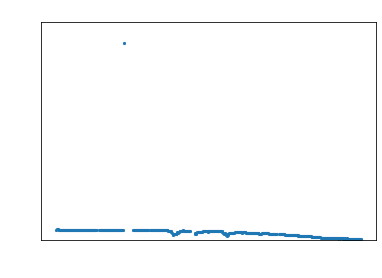

[DEBUG] listing adjusted sources
[FluxFinder] Plotting light curve for source None
[FluxFinder] Making light curve for source None (adjusted=True)


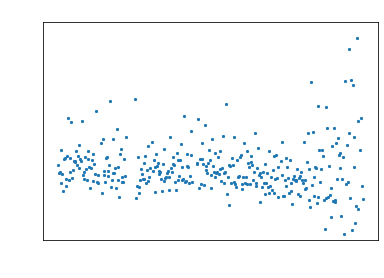

[FluxFinder] Plotting light curve for source None
[FluxFinder] Making light curve for source None (adjusted=True)


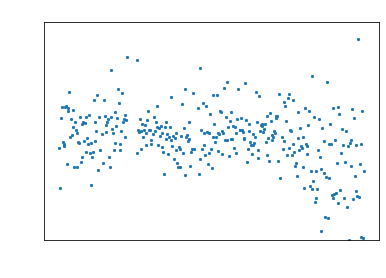

[FluxFinder] Plotting light curve for source None
[FluxFinder] Making light curve for source None (adjusted=True)


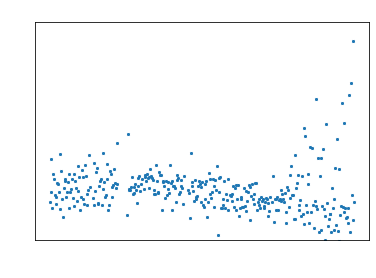

Finished adjusting light curves at 13:26:43


In [13]:
print("[Main] Plotting light curves")
avg_fname = "{}_avg{}".format(config.image_prefix, config.standard_file_extension)
avg_path = os.path.join(config.workspace_dir, avg_fname)
ff.plot_avg_light_curve(avg_path, adjusted=True, show=True)
ff.plot_all_light_curves(variable_ids, adjusted=True, show=True)

#c.show_variables(ff)
Utilities.print_job("adjusting light curves")

In [14]:
da.get_means_and_stds(adjusted=True)
da.get_variables(ff, adjusted=True)
da.plot_means_and_stds(adjusted=True)
da.output_results()
da.create_thumbnails(ff)

Utilities.print_job("everything")

[DEBUG] listing adjusted sources
[DataAnalyser] cosmic detected at approx 12005s in id:
[DataAnalyser] Removed cosmics on id {} 534
[DataAnalyser] cosmic detected at approx 12215s in id:
[DataAnalyser] Removed cosmics on id {} 489
[DataAnalyser] cosmic detected at approx 12145s in id:
[DataAnalyser] Removed cosmics on id {} 967
[DataAnalyser] cosmic detected at approx 11760s in id:
[DataAnalyser] Removed cosmics on id {} 710
[DataAnalyser] cosmic detected at approx 10675s in id:
[DataAnalyser] Removed cosmics on id {} 537
[DataAnalyser] cosmic detected at approx 12215s in id:
[DataAnalyser] Removed cosmics on id {} 232
[DataAnalyser] cosmic detected at approx 12145s in id:
[DataAnalyser] Removed cosmics on id {} 924
[DataAnalyser] cosmic detected at approx 11130s in id:
[DataAnalyser] Removed cosmics on id {} 314
[DataAnalyser] cosmic detected at approx 11935s in id:
[DataAnalyser] Removed cosmics on id {} 1167
[DataAnalyser] cosmic detected at approx 11795s in id:
[DataAnalyser] Remov

[DataAnalyser] cosmic detected at approx 11025s in id:
[DataAnalyser] Removed cosmics on id {} 116
[DataAnalyser] cosmic detected at approx 12215s in id:
[DataAnalyser] Removed cosmics on id {} 945
[DataAnalyser] cosmic detected at approx 10675s in id:
[DataAnalyser] Removed cosmics on id {} 994
[DataAnalyser] cosmic detected at approx 11515s in id:
[DataAnalyser] Removed cosmics on id {} 909
[DataAnalyser] cosmic detected at approx 11900s in id:
[DataAnalyser] Removed cosmics on id {} 925
[DataAnalyser] cosmic detected at approx 11865s in id:
[DataAnalyser] Removed cosmics on id {} 859
[DataAnalyser] cosmic detected at approx 11865s in id:
[DataAnalyser] Removed cosmics on id {} 303
[DataAnalyser] cosmic detected at approx 12040s in id:
[DataAnalyser] Removed cosmics on id {} 549
[DataAnalyser] cosmic detected at approx 12215s in id:
[DataAnalyser] Removed cosmics on id {} 509
[DataAnalyser] cosmic detected at approx 11445s in id:
[DataAnalyser] Removed cosmics on id {} 104
[DataAnaly

[FluxFinder] Making light curve for source 689 (adjusted=True)
[FluxFinder] Plotting light curve for source 532
[FluxFinder] Making light curve for source 532 (adjusted=True)
[FluxFinder] Plotting light curve for source 557
[FluxFinder] Making light curve for source 557 (adjusted=True)
[FluxFinder] Plotting light curve for source 403
[FluxFinder] Making light curve for source 403 (adjusted=True)
[FluxFinder] Plotting light curve for source 992
[FluxFinder] Making light curve for source 992 (adjusted=True)
[FluxFinder] Plotting light curve for source 1133
[FluxFinder] Making light curve for source 1133 (adjusted=True)
[FluxFinder] Plotting light curve for source 54
[FluxFinder] Making light curve for source 54 (adjusted=True)
[FluxFinder] Plotting light curve for source 257
[FluxFinder] Making light curve for source 257 (adjusted=True)
[FluxFinder] Plotting light curve for source 396
[FluxFinder] Making light curve for source 396 (adjusted=True)
[FluxFinder] Plotting light curve for sou

## Debug land

In [ ]:
## Imports
import Reducer
import ShiftFinder
import FluxFinder
import DataAnalyser
import Constants
import Utilities
import MovingObjectFinder
import StreakFinder
import Cataloguer

from datetime import datetime
import os
import importlib

In [ ]:
config = Constants.Config(
    #image_subdir = "../images/0121",
    image_dir = "/home/callum/mnt/data/jgtdata/l137_0",
    image_prefix = "l137_0",
    has_sets = True,
    set_size = 10,
    n_sets = 5
)

In [ ]:
Reducer = importlib.reload(Reducer)
ShiftFinder = importlib.reload(ShiftFinder)
FluxFinder = importlib.reload(FluxFinder)
DataAnalyser = importlib.reload(DataAnalyser)
Utilities = importlib.reload(Utilities)
Cataloguer = importlib.reload(Cataloguer)
Constants = importlib.reload(Constants)

In [ ]:
c = Cataloguer.Cataloguer(config)
catalogue_image = os.path.join(config.image_dir,
        config.image_format_str.format(1, 1))
#print(catalogue_image)
c.catalogue(catalogue_image)

In [ ]:
ff = FluxFinder.FluxFinder(config, c.get_n_sources())
ff.make_light_curves()